# Predicting Economies Using World Bank Datasets

Sean McSkeane, Albert Chu, Sonny Liu

### Table of Contents

### Introduction

Write brief introduction here. 

### Definitions

Should define some of the terms we will be using GDP.

## <center>Data Collection<center>

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from statsmodels import api as sm
import folium
import json
from pandas.io.json import json_normalize

For the purposes of this project, we used data from the World Bank dataset. The World Bank site allowed for us to build a custom dataset by choosing the variables that we wanted. We chose to include variables that we thought could be used a predictors of GDP. We purposely chose more variables than we planned on using as we were unsure of the quality of the data, and which variables were missing values.

In [2]:
worldBankDevInc = pd.read_csv("WorldBankData/data.csv")
worldCountries = pd.read_json("world-countries.json")

worldBankDevInc.dropna(inplace=True)
countryName = ""
first = True
newRows = []
countriesData = []

for index, row in worldBankDevInc.iterrows():
    if (countryName != row["Country Name"]):
        if (first == False):
            #CHOSE WHAT YEARS TO DROP HERE
            df = df.drop(df.loc[:, '1960 [YR1960]':'1990 [YR1990]'].columns, axis = 1)  
            countriesData.append(df)
            # IF YOU WANT TO SEE ALL COUNTRIES DATA UNCOMMENT THIS
            #with pd.option_context('display.max_rows', None, 'display.max_columns', None):
                #display(df)
        countryName = row["Country Name"]
        df = pd.DataFrame(columns=worldBankDevInc.columns) 
        first = False
        
    df = df.append(row, ignore_index=True)

df  = df.drop(df.loc[:, '1960 [YR1960]':'1990 [YR1990]'].columns, axis = 1) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)
    display(countriesData[0])

,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,World,WLD,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,89.7470779418945,..,89.8867263793945,89.73896,89.76079,90.09036,90.28756,90.44798,90.30999,90.5136,90.48209,90.45493,..
1,World,WLD,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,1.46301808779616,2.4680809839501,1.71835487641421,3.74858458862741,3.29835475775853,2.21669252517704,3.62068678447997,1.55599024690241,2.79115821485058,3.44953652132376,1.87066384914678,3.61999537345889,1.57430765382489,5.52540304277476,3.41670430543519,4.79799348316917,5.13918913741134,-0.108027864217718,-1.0217153334587,4.82408306126788,2.91431395916423,3.08983534636607,2.27578094371812,3.01262664499615,3.13334710859108,2.35749617104845,3.00433197520826,..,..
2,World,WLD,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
3,World,WLD,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,..,..,..,8.56202153951592,8.9627248859483,9.30874245225373,9.458788244142,9.34750634702223,9.29471275406602,9.20008442422269,9.04112199123932,9.06090065244793,9.82514331356262,9.56935837112177,9.45270493564931,9.46374185948091,9.50753125576719,9.59698254405745,9.88628070186998,10.0231959648361,..,..,..
4,World,WLD,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,43.8002650137584,43.6365914248492,42.8938027932221,42.2060851083481,41.3664043310787,40.6965624449873,40.2624711329534,40.2381994624912,40.1991446935927,40.0648979418348,39.7327187451559,39.508811405597,39.0601063609179,38.0021749104642,37.1021712566213,35.9629867428729,35.0148042564423,34.42401720717,33.8572454843509,33.1967643212232,32.2266382221097,31.2779769403582,30.5013693112494,29.7013114430674,29.1733692090603,28.8098172705724,28.4093104076149,28.2649635947778,28.1411866629902
5,World,WLD,Employment in industry (% of total employment)...,SL.IND.EMPL.ZS,21.6516925324977,21.527138324844,21.6117847103248,21.6964127337876,21.823627158468,21.8885375999451,21.787656173132,21.4629106755983,21.3136240854945,21.2086816957152,21.1149087439687,20.9815466985686,21.0058224818388,21.3241094091881,21.6263803354217,21.9834910554221,22.2665665618542,22.2982073045985,22.1614205882075,22.3498706986421,22.6792350814686,22.9096640861569,23.0275552536606,23.2210070720774,23.1806466409856,23.105875978489,23.0748891251629,22.9498246350747,22.8291833739327
6,World,WLD,Employment in services (% of total employment)...,SL.SRV.EMPL.ZS,34.5481369437425,34.8363221476465,35.4942497012682,36.0975310809452,36.8099384152528,37.4148610138978,37.9497001612886,38.2988328143032,38.4872289585557,38.7264541003861,39.1524242073817,39.5096367680363,39.9340769184264,40.6737616928555,41.2714385034704,42.0535163432295,42.7186294716704,43.2780004665421,43.9814271154991,44.4532708709787,45.0942780497361,45.8123736043997,46.4711018305852,47.0776974570266,47.6459613287286,48.0842975502874,48.5157871037455,48.7854215612607,49.0294793237334
7,World,WLD,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,3.15728608428153,3.07150626304713,2.98762638660655,2.9218663068883,2.86248058473237,2.81686061709299,2.77690516363071,2.74597320006002,2.7163022872551,2.69586251011468,2.66614672236542,2.64353726115005,2.62467609997849,2.60840174751692,2.58784841595025,2.57697124785772,2.566975770183,2.55491845917954,2.5341511670112,2.5162725848584,2.49867606841139,2.48925388225474,2.47289032143786,2.46559804914154,2.45602971225356,2.44521748363156,

,Country Name,Country Code,Series Name,Series Code,1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,..,..,26.7660007476807,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,AFG,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
2,Afghanistan,AFG,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,10957399304.7765,13930447062.0795,15584208613.716,17287683729.9852,17779146289.3555,17682396266.0887,17285140982.1924,16482932351.9102,16916992771.6571,..,..
3,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,..,..,..,..,..,..,..,..,..,..,9.44339057,8.94125853,9.80847323,9.94828911,10.62276563,9.90467425,10.25649568,9.81848731,8.56967118,8.56190731,7.89716844,8.8059641,9.52887835,10.09395812,10.19867734,..,..,..
4,Afghanistan,AFG,Employment in agriculture (% of total employme...,SL.AGR.EMPL.ZS,57.6619987487793,58.3139991760254,63.8479995727539,68.8030014038086,63.2019996643066,64.568000793457,65.7529983520508,66.7679977416992,67.8479995727539,69.0940017700195,70.3170013427734,63.4770011901855,62.6990013122559,62.5340003967285,61.4830017089844,60.9150009155273,59.8330001831055,59.2939987182617,53.5309982299805,48.8380012512207,44.5379981994629,38.8779983520508,38.6870002746582,38.6459999084473,38.6780014038086,38.818000793457,38.773998260498,38.5880012512207,38.3240013122559
5,Afghanistan,AFG,Employment in industry (% of total employment)...,SL.IND.EMPL.ZS,14.21399974823,13.3319997787476,10.2819995880127,7.80600023269653,10.5,9.85200023651123,9.32900047302246,8.92199993133545,8.4980001449585,8.00699996948242,7.43400001525879,10.1949996948242,10.4370002746582,10.7150001525879,11.6899995803833,12.2239999771118,12.5150003433228,12.4779996871948,14.2530002593994,15.048999786377,15.7969999313354,17.1569995880127,17.1609992980957,17.4559993743896,17.6469993591309,17.4249992370605,17.4570007324219,17.5960006713867,17.7999992370605
6,Afghanistan,AFG,Employment in services (% of total employment)...,SL.SRV.EMPL.ZS,28.1240005493164,28.3530006408691,25.8700008392334,23.3910007476807,26.298999786377,25.5799999237061,24.9179992675781,24.3099994659424,23.6539993286133,22.8990001678467,22.25,26.3279991149902,26.8640003204346,26.75,26.8269996643066,26.8610000610352,27.6520004272461,28.2280006408691,32.2159996032715,36.1139984130859,39.6650009155273,43.9650001525879,44.1529998779297,43.8979988098145,43.6749992370605,43.7560005187988,43.7680015563965,43.8160018920898,43.8759994506836
7,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.479,7.502,7.535,7.572,7.606,7.629,7.632,7.61,7.561,7.485,7.387,7.272,7.148,7.016,6.875,6.722,6.555,6.373,6.18,5.977,5.77,5.562,5.359,5.163,4.976,4.8,4.633,..,..
8,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,..,..,..,..,..,..,..,..,..,..,..,4055176933.36905,4515563413.82564,5226775163.30205,6209140044.00519,6971286731.72065,9747886104.53251,10109218067.7904,12439087076.7667,15856574731.4411,17804280538.1102,20001615788.6719,20561054090.3995,20484873230.2111,19907111418.9938,19362642266.6484,20191764940.1602,19362969582.3643,..
9,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,..,..,..,..,..,..,..,..,..,..,..,..,8.83227780370231,1.41411798021916,11.2297148388595,5.35740324754602,13.8263195390595,3.92498382284523,21.390528405312,14.3624414596815,0.426354792856571,12.7522870825788,5.60074466131904,2.72454336495028,1.45131465458005,2.

## <center>Data Processing<center>

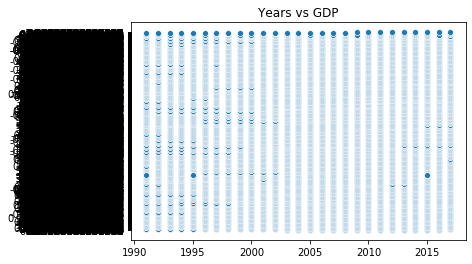

In [7]:
worldData = pd.concat(countriesData)
years = []
GDP = []
counter = 4
year = 1991

for index, row in worldData.iterrows():
    if row["Series Name"] == "GDP growth (annual %)":
        for x in range(27):
            if (row[counter] != ".."):
                GDP.append(row[counter])
                years.append(year)
            year += 1
            counter += 1
        year = 1991
        counter = 4

# for x in range(1000):
#     print(GDP[x])
# print(years)
    
# print(len(GDP))
# print(len(years))

scatterPlot = sns.scatterplot(x=years, y=GDP).set_title('Years vs GDP')

In [8]:
worldData = worldData[["Country Name","Country Code", "Series Name", "Series Code", "2015 [YR2015]"]]

counter = 0
indx = 0
predictors = pd.DataFrame(columns = ["countryName", "Country Code"])
for index, row in worldData.iterrows():
    if row["Country Name"] not in predictors.countryName.values:
        predictors = predictors.append({"countryName": row["Country Name"], "Country Code": row["Country Code"]}, ignore_index=True)
predictors["Current health expenditure (% of GDP)"] = 0.0
predictors["Government expenditure on education, total (% of GDP)"] = 0.0
predictors["Prevalence of undernourishment (% of population)"] = 0.0
predictors["GDP per capita (current US$)"] = 0.0
for index, row in worldData.iterrows():
    if row["Series Name"] in predictors.columns:
        counter += 1
        if row["2015 [YR2015]"] != "..":
            predictors.at[indx, row["Series Name"]] = row["2015 [YR2015]"]
        else:
            predictors.at[indx, row["Series Name"]] = np.nan
        if counter % 4 == 0:
            counter = 0
            indx += 1
predictors = predictors.dropna()
predictors

,countryName,Country Code,Current health expenditure (% of GDP),"Government expenditure on education, total (% of GDP)",Prevalence of undernourishment (% of population),GDP per capita (current US$)
0,Afghanistan,AFG,10.093958,3.25580,28.6,578.466353
1,Albania,ALB,6.819740,3.43797,6.0,3952.830781
7,Argentina,ARG,8.743315,5.77611,3.6,13789.060425
8,Armenia,ARM,10.117628,2.80591,3.8,3607.296697
10,Australia,AUS,9.330067,5.32175,2.5,56748.420261
...,...,...,...,...,...,...
197,Tunisia,TUN,7.006750,6.59921,4.4,3859.814436
202,Uganda,UGA,6.333950,2.77376,37.5,709.021039
205,United Kingdom,GBR,9.792735,5.60939,2.5,44472.151701
208,Uzbekistan,UZB,6.095582,7.07882,6.4,2615.025134


In [ ]:
dataGDP = pd.DataFrame(columns=["Country Name", "Country Code", "GDP2015"])
for index, row in worldData.iterrows():
    if row["Series Name"] == "GDP (current US$)":
        dataGDP = dataGDP.append({"Country Name": row["Country Name"], "Country Code": row["Country Code"], "GDP2015": row["2015 [YR2015]"]}, ignore_index=True)
dataGDP


## <center>Exploratory Analysis and Data Visualization<center>

In [ ]:
#worldCountries 

# NEED COUNTRIES IN dataGDP to match countries in worldCountries.

m = folium.Map(location=[37, -102], zoom_start=5)

#folium.Choropleth(
#    geo_data="world-countries.json",
#    name='choropleth',
#    data=dataGDP,
#    columns=['Country Name', 'GDP2015'],
#    key_on='feature.id',
#    fill_color='YlGn',
#    fill_opacity=0.7,
#    line_opacity=0.2,
#    legend_name='Unemployment Rate (%)'
#).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
worldBankDevInc.describe()

## <center>Analysis, Hypothesis Testing, and Machine Learning<center>

### Predicting GDP Using Access to Healthcare

### Predicting GDP Using Access to Technology

### Predicting GDP Using Education

### Predicting GDP Using Sanitation

### Predicting GDP Using Corruption

## <center>Insight and Policy Decision<center>